On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

## a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's first explore the dataset and find out some of the first order statistical features for the 'order_amount' feature.

In [16]:
!git clone -b master https://github.com/robmanch/Shopify.git

fatal: destination path 'Shopify' already exists and is not an empty directory.


In [17]:
df = pd.read_csv('Shopify/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [18]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

As we can see that the max value is much higher than the third quartile. Also, the standard deviation is $41282, which is very high. Let's check for the outliers by ploting box plot.

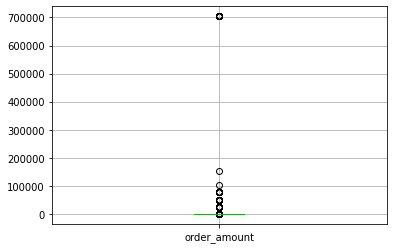

In [19]:
df.boxplot('order_amount') # to plot boxplot

In the above plot, we can only see a line at 0 and so many high values, which shows there are outliers present in the data. For finding the Average Order value (AOV), mean is not a correct as it is sensitive to the outliers.

In [20]:
def calculate_quantile(col, q):
    "This function calculates value of quantile for a given data series and quantile"
    
    quant = col.quantile(q)
    return quant

In [21]:
calculate_quantile(df['order_amount'], 0.987)

1408.0

It is intersting to know that 98.7% of orders are less than the $1408.

### Finding Outliers

In [22]:
q_1 = calculate_quantile(df['order_amount'], 0.25) # First Quartile
q_3 = calculate_quantile(df['order_amount'], 0.75) # Third Quartile
IQR = q_3 - q_1 # Inter Quartile Range
IQR

227.0

In [23]:
lower_outlier = q_1 - 1.5*IQR # Order amounts that are lesser than the lower outlier are outliers.
higher_outlier = q_3 + 1.5*IQR # Order amounts that are higher than the higher outlier are outliers.

In [24]:
df_no_outliers = df.loc[(df['order_amount'] < higher_outlier) & (df['order_amount'] > lower_outlier)] # Data with no outliers
df_outliers = df.loc[(df['order_amount'] > higher_outlier) | (df['order_amount'] < lower_outlier)] # Data with only outliers

In [25]:
-np.sort(-df_outliers['order_amount'].unique()) # Outliers

array([704000, 154350, 102900,  77175,  51450,  25725,   1760,   1408,
         1086,   1064,   1056,    980,    965,    960,    948,    935,
          920,    890,    885,    880,    865,    845,    830,    816,
          815,    810,    805,    804,    800,    790,    786,    784,
          780,    774,    772,    765,    760,    748,    745,    740,
          736,    735])

The above array contains the outliers that are present in this dataset.

Lest's have a look at the data that has outliers.

In [26]:
df.loc[df['order_amount'] == 704000].sort_values(by = 'order_amount', ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00


It's interesting to see that there are multiple orders with same value, and these are not duplicates as the date is different. These orders may belong to the big/wholesale buyers.

Now, let's plot the boxplot and histogram for the data with no outliers.

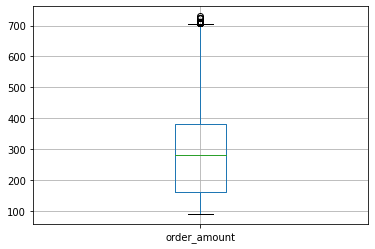

In [27]:
df_no_outliers.boxplot('order_amount')

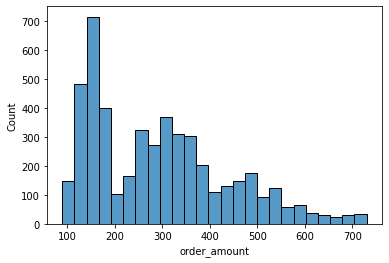

In [28]:
sns.histplot(x = df_no_outliers['order_amount'])

It can be seen from the above plot that the distribution of the data is right skewed, hence median should be used to find average.

In [29]:
df_no_outliers['order_amount'].describe()

count    4859.000000
mean      293.715374
std       144.453395
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64

So we should that metric which is insensitive to the outliers.

## What metric would you report for this dataset?

Median of this data (with no outliers) should be used to evaluate the AOV.

## c. What is its value?

In [30]:
df_no_outliers['order_amount'].median()

280.0